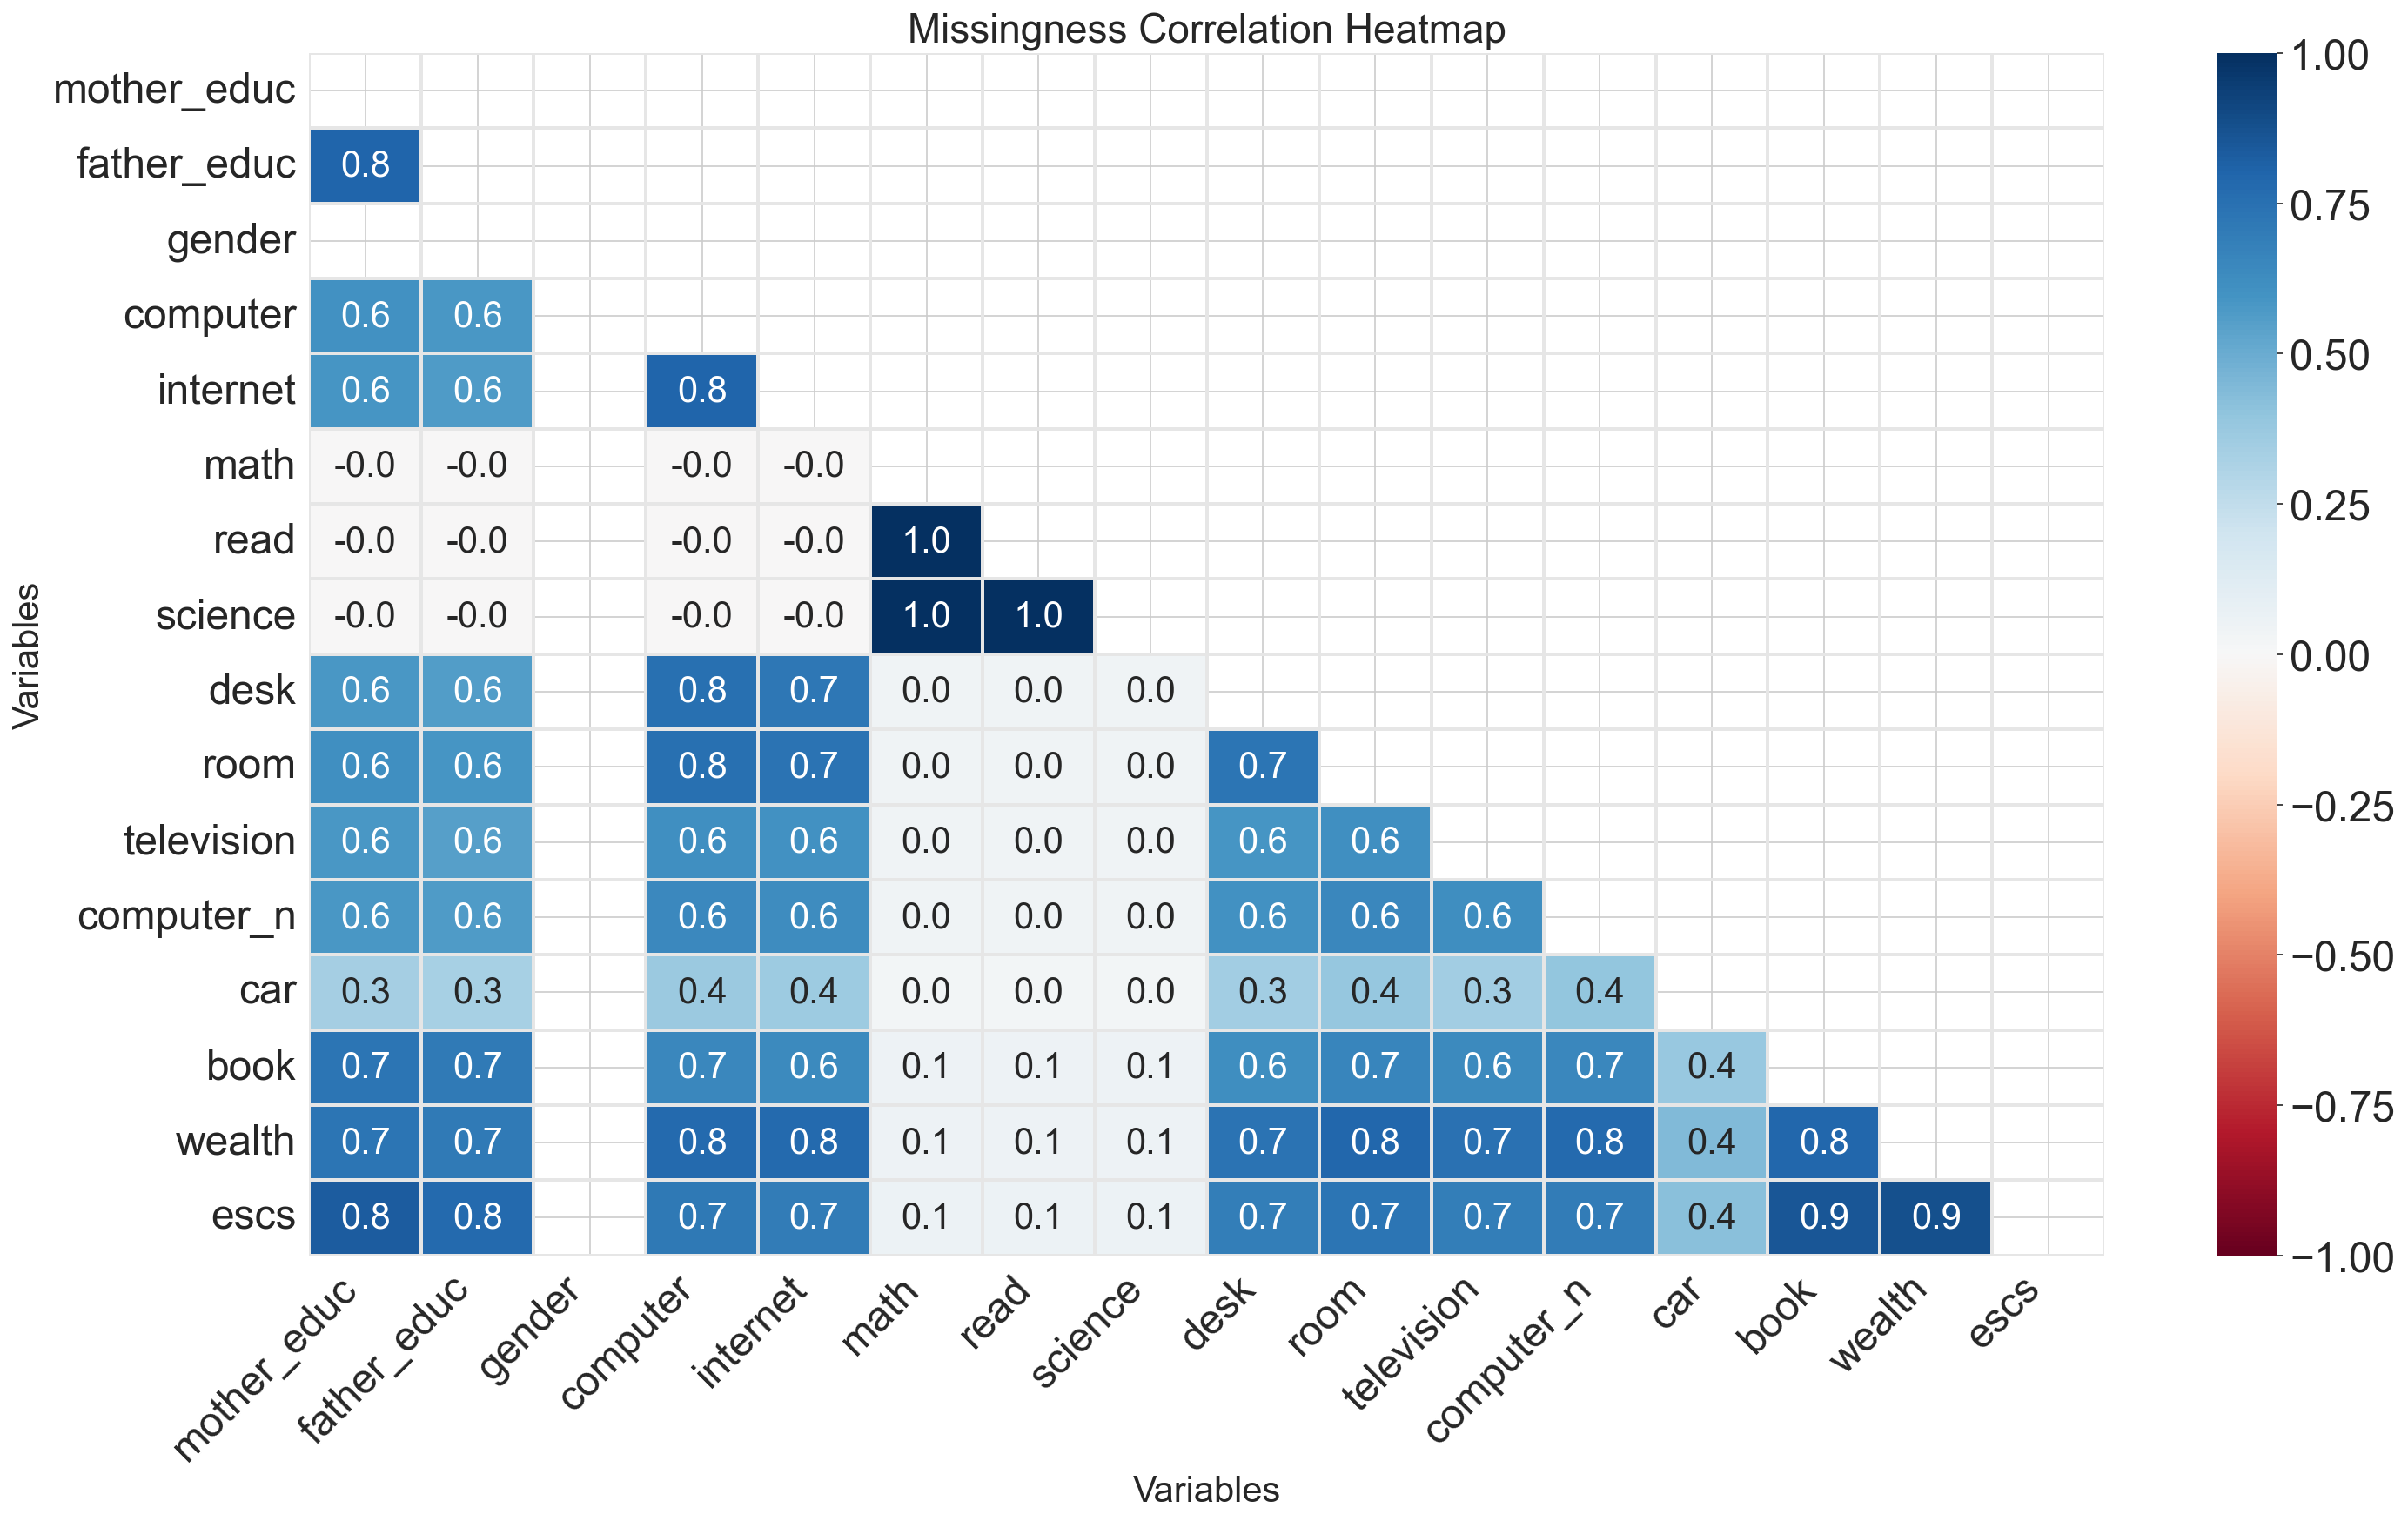

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "xtick.labelsize": 23,
    "ytick.labelsize": 23,
    "legend.fontsize": 18
})
path = "student_data_2018.csv"
df = pd.read_csv(path)


preferred_order = [
    "mother_educ", "father_educ", "gender",
    "computer", "internet",
    "math", "read", "science",
    "desk", "room", "television", "computer_n", "car", "book", "wealth", "escs"
]
cols = [c for c in preferred_order if c in df.columns]

if not cols:
    # Fallback: use all columns
    cols = df.columns.tolist()


# Build missingness matrix and correlation
miss = df[cols].isna().astype(float)


corr = miss.corr()
# Mask upper triangle (show lower triangle only)

mask = np.triu(np.ones_like(corr, dtype=bool))


fig, ax = plt.subplots(figsize=(20, 12), dpi=150)


sns.heatmap(
    corr,
    mask=mask,
    cmap="RdBu", vmin=-1, vmax=1, center=0,   # <-- not "RdBu_r"
    annot=True, fmt=".1f",
    annot_kws={"size": 20},
    linewidths=1.0, linecolor="#e6e6e6",
    cbar=True, square=False, ax=ax
)


ax.set_title("Missingness Correlation Heatmap")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

fig.tight_layout()


